In [87]:
# test file to look at the data and see how to use it
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
absolute_path = os.path.abspath("")


In [88]:
hs1104df = pd.read_csv(absolute_path + "\cleanerHS1104.csv")
hs1104df["Time In"] = pd.to_datetime(hs1104df["Time In"])
hs1104df["Time Out"] = pd.to_datetime(hs1104df["Time Out"])
hs1104df["Time Out Clean"] = pd.to_datetime(hs1104df["Time Out Clean"])

hs1104df

,Date,Dismissal Location,Time In,Time Out,Time In Clean,Time Out Clean,Time Difference,Diff Mins,carpool_id
0,11/4/22 14:00,12th Grade,2022-11-04 13:25:00,2022-11-04 13:27:00,13:25,2023-05-12 13:27:00,0:02:00,2,111461
1,11/4/22 14:00,10th Grade,2022-11-04 13:54:00,2022-11-04 15:14:00,13:54,2023-05-12 15:14:00,1:20:00,80,111487
2,11/4/22 14:00,10th Grade,2022-11-04 14:11:00,2022-11-04 14:20:00,14:11,2023-05-12 14:20:00,0:09:00,9,111534
3,11/4/22 14:00,9th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-12 14:25:00,0:10:00,10,111551
4,11/4/22 14:00,12th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-12 14:25:00,0:10:00,10,111551
...,...,...,...,...,...,...,...,...,...
85,11/4/22 14:00,11th Grade,2022-11-04 15:44:00,2022-11-04 15:52:00,15:44,2023-05-12 15:52:00,0:08:00,8,111857
86,11/4/22 14:00,9th Grade,2022-11-04 15:45:00,2022-11-04 15:52:00,15:45,2023-05-12 15:52:00,0:07:00,7,111861
87,11/4/22 14:00,11th Grade,2022-11-04 15:50:00,2022-11-07 15:13:00,15:50,2023-05-12 15:13:00,71:23:00,"4,283",111869
88,11/4/22 14:00,9th Grade,2022-11-04 15:53:00,2022-11-04 15:59:00,15:53,2023-05-12 15:59:00,0:06:00,6,111872


In [89]:
hs1104df["Difference"] = hs1104df["Time Out"] - hs1104df["Time In"]
hs1104df

,Date,Dismissal Location,Time In,Time Out,Time In Clean,Time Out Clean,Time Difference,Diff Mins,carpool_id,Difference
0,11/4/22 14:00,12th Grade,2022-11-04 13:25:00,2022-11-04 13:27:00,13:25,2023-05-12 13:27:00,0:02:00,2,111461,0 days 00:02:00
1,11/4/22 14:00,10th Grade,2022-11-04 13:54:00,2022-11-04 15:14:00,13:54,2023-05-12 15:14:00,1:20:00,80,111487,0 days 01:20:00
2,11/4/22 14:00,10th Grade,2022-11-04 14:11:00,2022-11-04 14:20:00,14:11,2023-05-12 14:20:00,0:09:00,9,111534,0 days 00:09:00
3,11/4/22 14:00,9th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-12 14:25:00,0:10:00,10,111551,0 days 00:10:00
4,11/4/22 14:00,12th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-12 14:25:00,0:10:00,10,111551,0 days 00:10:00
...,...,...,...,...,...,...,...,...,...,...
85,11/4/22 14:00,11th Grade,2022-11-04 15:44:00,2022-11-04 15:52:00,15:44,2023-05-12 15:52:00,0:08:00,8,111857,0 days 00:08:00
86,11/4/22 14:00,9th Grade,2022-11-04 15:45:00,2022-11-04 15:52:00,15:45,2023-05-12 15:52:00,0:07:00,7,111861,0 days 00:07:00
87,11/4/22 14:00,11th Grade,2022-11-04 15:50:00,2022-11-07 15:13:00,15:50,2023-05-12 15:13:00,71:23:00,"4,283",111869,2 days 23:23:00
88,11/4/22 14:00,9th Grade,2022-11-04 15:53:00,2022-11-04 15:59:00,15:53,2023-05-12 15:59:00,0:06:00,6,111872,0 days 00:06:00


In [113]:
#eliminate bad data
#clean data
for index, row in hs1104df.iterrows():
    if (row["Difference"].total_seconds()/60) > 300:
        hs1104df.drop(index, inplace=True)

hs1104df

,Date,Dismissal Location,Time In,Time Out,Time In Clean,Time Out Clean,Time Difference,Diff Mins,carpool_id,Difference
0,11/4/22 14:00,12th Grade,2022-11-04 13:25:00,2022-11-04 13:27:00,13:25,2023-05-12 13:27:00,2023-05-12 00:02:00,2,111461,0 days 00:02:00
1,11/4/22 14:00,10th Grade,2022-11-04 13:54:00,2022-11-04 15:14:00,13:54,2023-05-12 15:14:00,2023-05-12 01:20:00,80,111487,0 days 01:20:00
2,11/4/22 14:00,10th Grade,2022-11-04 14:11:00,2022-11-04 14:20:00,14:11,2023-05-12 14:20:00,2023-05-12 00:09:00,9,111534,0 days 00:09:00
3,11/4/22 14:00,9th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-12 14:25:00,2023-05-12 00:10:00,10,111551,0 days 00:10:00
4,11/4/22 14:00,12th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-12 14:25:00,2023-05-12 00:10:00,10,111551,0 days 00:10:00
...,...,...,...,...,...,...,...,...,...,...
83,11/4/22 14:00,9th Grade,2022-11-04 15:40:00,2022-11-04 15:43:00,15:40,2023-05-12 15:43:00,2023-05-12 00:03:00,3,111849,0 days 00:03:00
84,11/4/22 14:00,11th Grade,2022-11-04 15:40:00,2022-11-04 15:53:00,15:40,2023-05-12 15:53:00,2023-05-12 00:13:00,13,111851,0 days 00:13:00
85,11/4/22 14:00,11th Grade,2022-11-04 15:44:00,2022-11-04 15:52:00,15:44,2023-05-12 15:52:00,2023-05-12 00:08:00,8,111857,0 days 00:08:00
86,11/4/22 14:00,9th Grade,2022-11-04 15:45:00,2022-11-04 15:52:00,15:45,2023-05-12 15:52:00,2023-05-12 00:07:00,7,111861,0 days 00:07:00


C:\Users\eesaa\AppData\Local\Temp\ipykernel_22272\1571350421.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_time, rotation=45, ha='right')


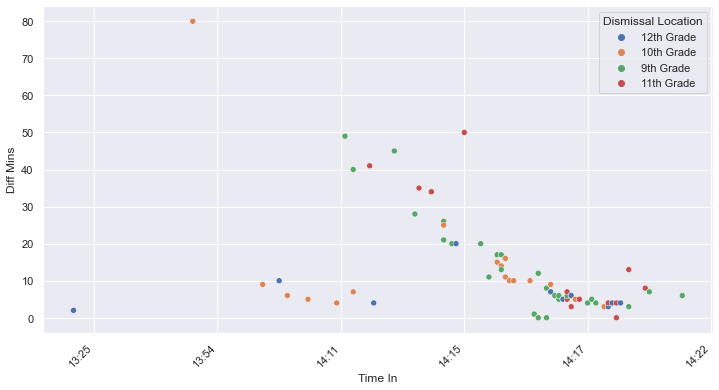

In [119]:
#using sns to make a scatterplot
sns.set_theme()
def plot_scatter_times(df):
    df["Time Difference"] = pd.to_datetime(df["Time Difference"])
    fig, ax = plt.subplots(figsize = (12,6))  
    fig = sns.scatterplot(data=df, 
                     x=df["Time In"],y="Diff Mins", hue="Dismissal Location", ax=ax)
    x_time = df["Time In"].dt.strftime("%H:%M").sort_values().unique()
    ax.set_xticklabels(labels=x_time, rotation=45, ha='right')
plot_scatter_times(hs1104df)
    

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

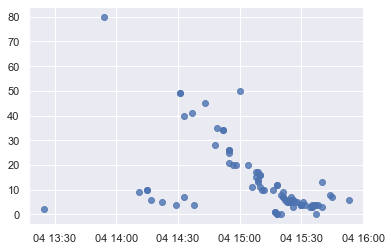

In [104]:
hs1104df["Diff Mins"] = pd.to_numeric(hs1104df["Diff Mins"])
sns.regplot(data=hs1104df, x="Time In",y="Diff Mins")
